# Capstone Project - Interim Report

### 1) Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
#sklearn(LR), Statsmodels(OLS)
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

### 2) Importing the Data

In [3]:
df_loan = pd.read_csv (r'C:\Users\DTH-IN\OneDrive - FLSmidth\Pictures\GL\Capstone\Training Data.csv\Training Data.csv')
df_loan.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
69584,69585,2605652,55,20,single,owned,no,Surgeon,Madanapalle,Andhra_Pradesh,9,14,0
34547,34548,2745694,36,11,single,rented,no,Industrial_Engineer,"Khora,_Ghaziabad",Uttar_Pradesh,9,13,0
33827,33828,4539410,35,5,single,owned,no,Software_Developer,Parbhani,Maharashtra,5,12,0
117263,117264,8105757,41,5,single,rented,no,Surgeon,Bardhaman,West_Bengal,4,11,0
237088,237089,5448973,71,8,single,rented,no,Computer_hardware_engineer,Ajmer,Rajasthan,8,10,0


## Dataset and Domain

#### Variable categorization (count of numeric and categorical)

In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df_loan.select_dtypes(include = 'object').head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [6]:
df_loan.select_dtypes(include = 'number').head()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,3,13,0
1,2,7574516,40,10,9,13,0
2,3,3991815,66,4,4,10,0
3,4,6256451,41,2,2,12,1
4,5,5768871,47,11,3,14,1


Inferences:
    
    -->Number of Catagorical Columns : 6
    
    -->Number of Numerical Columns : 7 of which one is our target variable

#### Pre Processing Data Analysis (count of missing/ null values, redundant columns, etc.)

Null or Missing Values

In [7]:
df_loan.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<b>Redundant Columns

In [8]:
for i in df_loan.columns:
    print('Number of Unique Variables in',i,'is:',df_loan[i].nunique())

Number of Unique Variables in Id is: 252000
Number of Unique Variables in Income is: 41920
Number of Unique Variables in Age is: 59
Number of Unique Variables in Experience is: 21
Number of Unique Variables in Married/Single is: 2
Number of Unique Variables in House_Ownership is: 3
Number of Unique Variables in Car_Ownership is: 2
Number of Unique Variables in Profession is: 51
Number of Unique Variables in CITY is: 317
Number of Unique Variables in STATE is: 29
Number of Unique Variables in CURRENT_JOB_YRS is: 15
Number of Unique Variables in CURRENT_HOUSE_YRS is: 5
Number of Unique Variables in Risk_Flag is: 2


<b> We will remove Id variable since it doesnt have any relation to predict risk flag.
    Since it has 25200 unique values we consider it as a redundant variable.

In [9]:
df = df_loan.copy()
df.drop('Id',axis=1,inplace=True)

## Exploratory Data Analysis

#### Converting and Labelling the Categorical Data

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Married/Single'] = le.fit_transform(df['Married/Single'])
df['House_Ownership'] = le.fit_transform(df['House_Ownership'])
df['Car_Ownership'] = le.fit_transform(df['Car_Ownership'])
df['Profession'] = le.fit_transform(df['Profession'])
df['CITY'] = le.fit_transform(df['CITY'])
df['STATE'] = le.fit_transform(df['STATE'])

In [11]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


#### Checking for multi-collinearity

<AxesSubplot:>

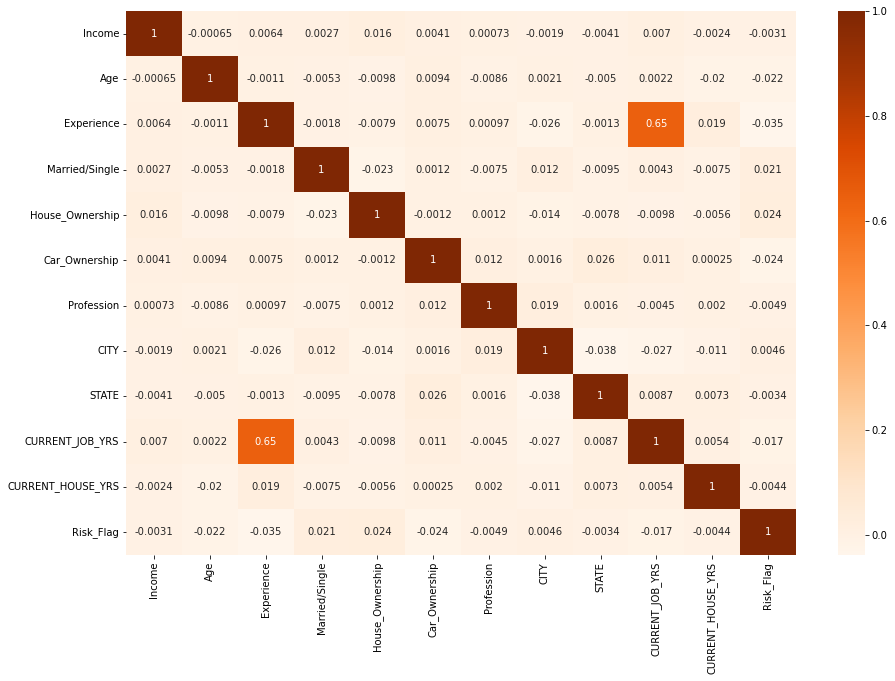

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Oranges')

<b>After checking correlation, we can see that CURRENT_JOB_YRS and Experience are highly correlated.

In [13]:
X = df.drop(columns = ['Risk_Flag'], axis = 1)
Y = df['Risk_Flag']

In [14]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data.sort_values(by=['VIF'])

,feature,VIF
5,Car_Ownership,1.430234
8,STATE,3.121924
7,CITY,3.845438
6,Profession,3.862300
0,Income,3.932711
2,Experience,6.547785
9,CURRENT_JOB_YRS,6.853027
1,Age,8.851960
3,Married/Single,9.073366
4,House_Ownership,19.768821


#### VIF of House Ownership, Married/Single and Current House Years are having high multicolleniarty.
This can hamper the accuracy and overall health of our machine learning models. We therefore remove these variables from our dataset. 

In [15]:
X.drop(columns = ['Married/Single','House_Ownership','CURRENT_HOUSE_YRS'], axis = 1, inplace = True)

#### Checking the distribution of variables

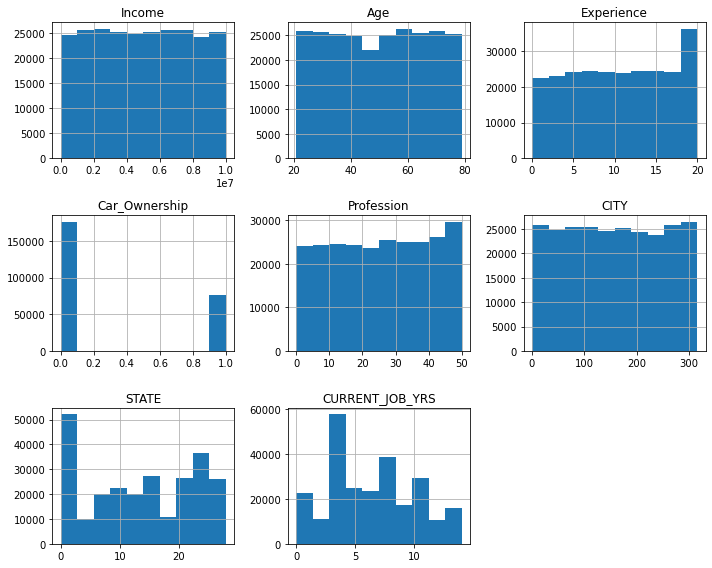

In [16]:
X.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [17]:
X['STATE'].shape

(252000,)

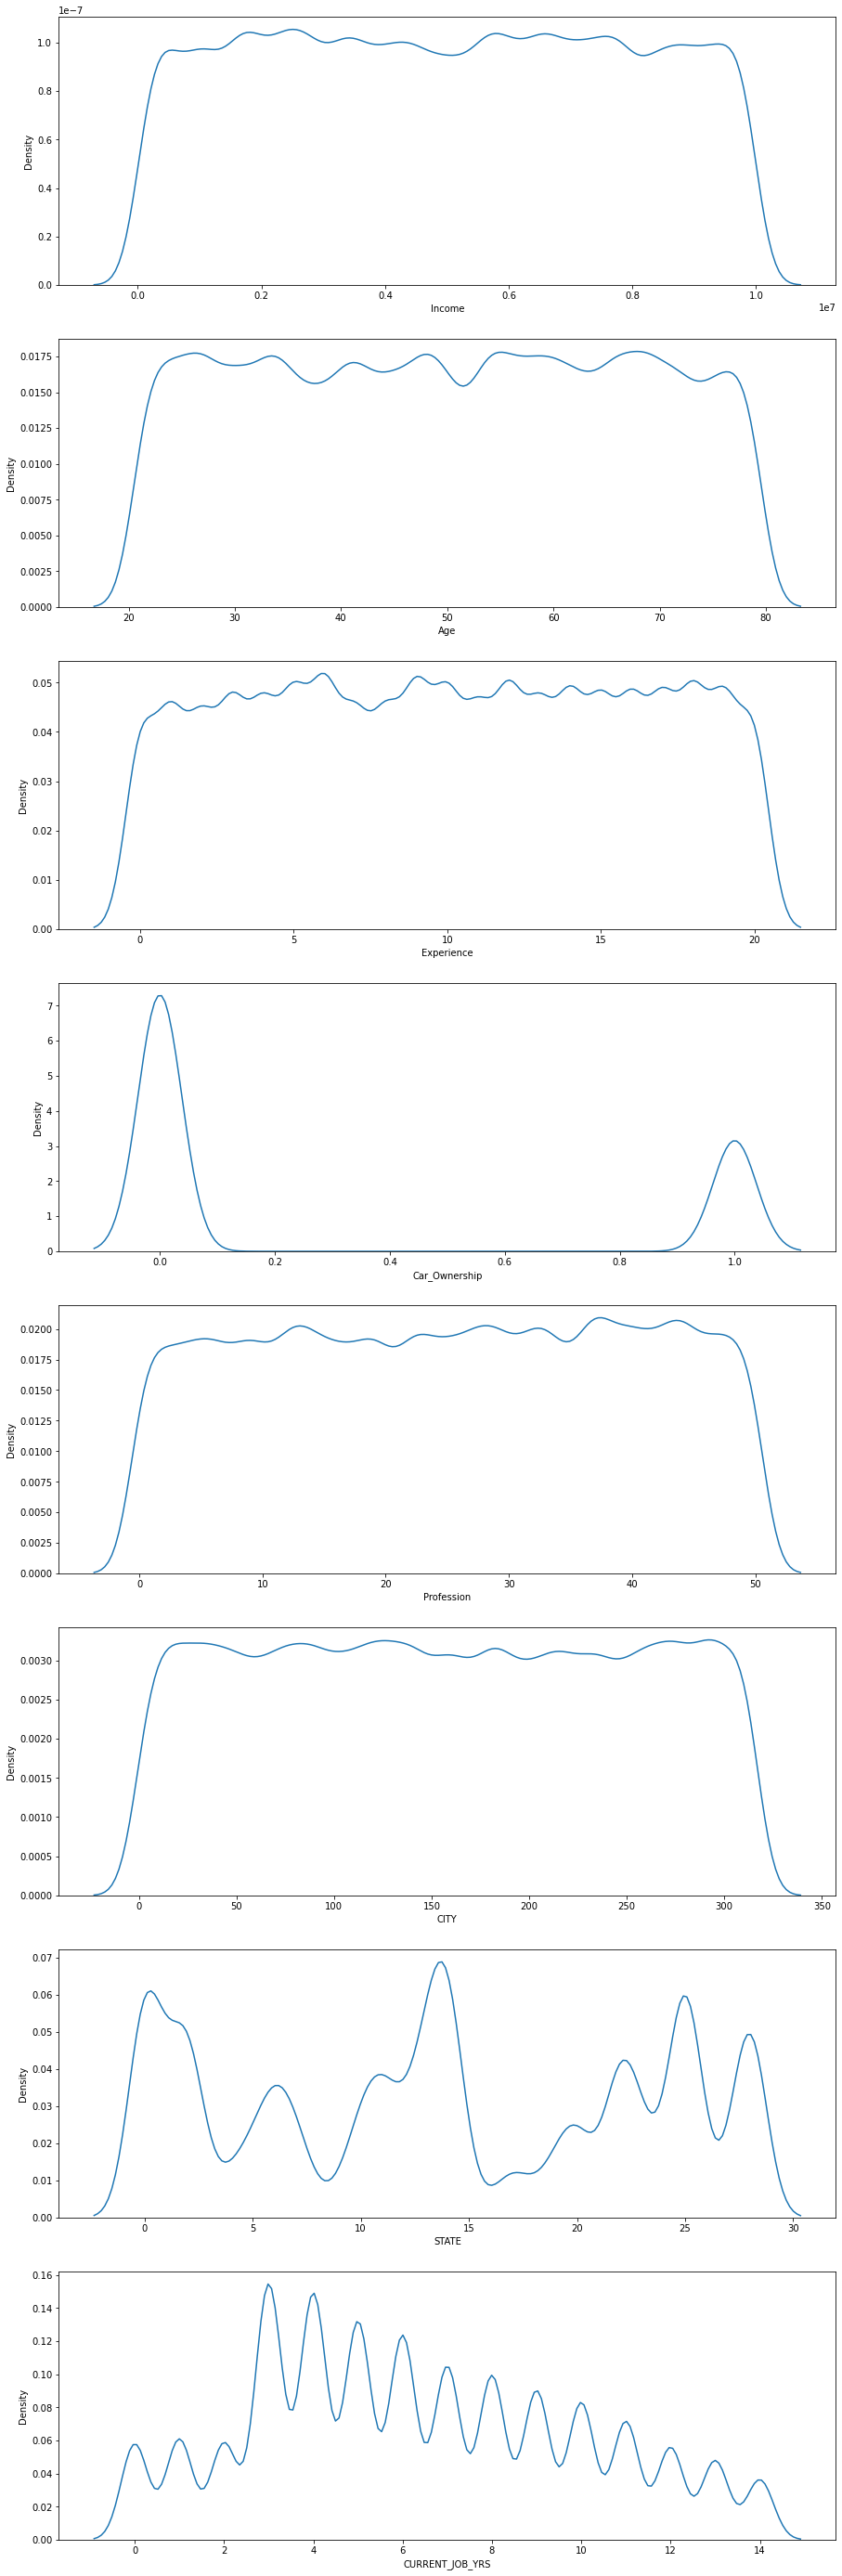

In [18]:
l = X.columns
plt.figure(figsize = (15,50))
for i in range(l.shape[0]):
    plt.subplot(l.shape[0],1,i+1)
    sns.kdeplot(X[l[i]])
    plt.xlabel(l[i])
plt.show()

### Outlier Examinations

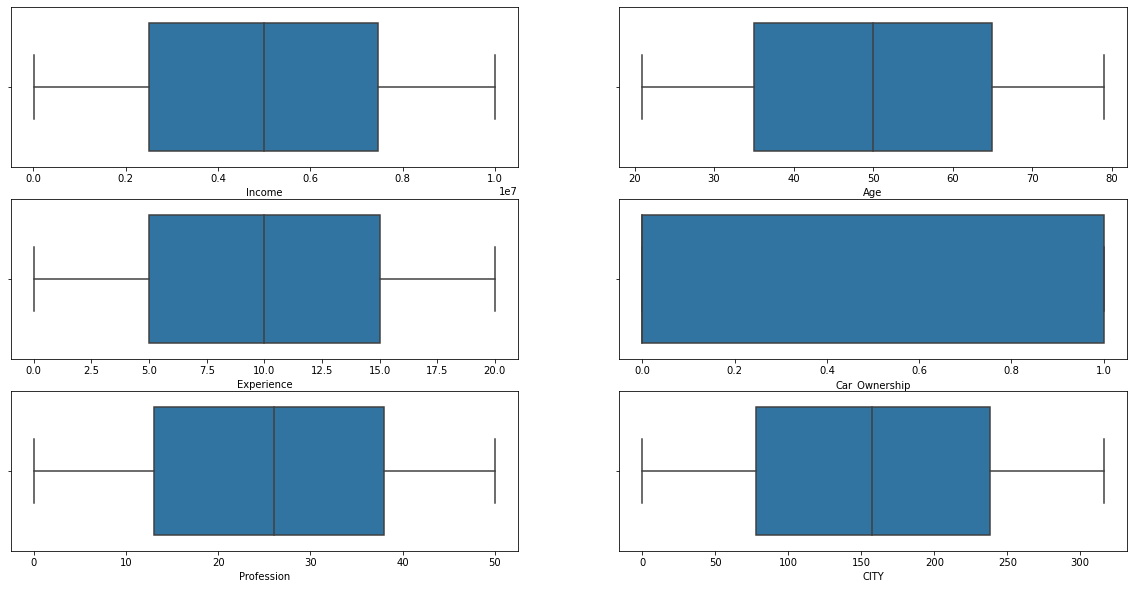

In [19]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for var,subplot in zip(X.columns,ax.flatten()):
    sns.boxplot(X[var],ax=subplot)
plt.show()

#As seen by all the boxplots, our data has no outliers. Car Ownership is an entire boxplot as it is an encoded catagorical column.

### Bivariate Analysis

<AxesSubplot:xlabel='Profession', ylabel='Income'>

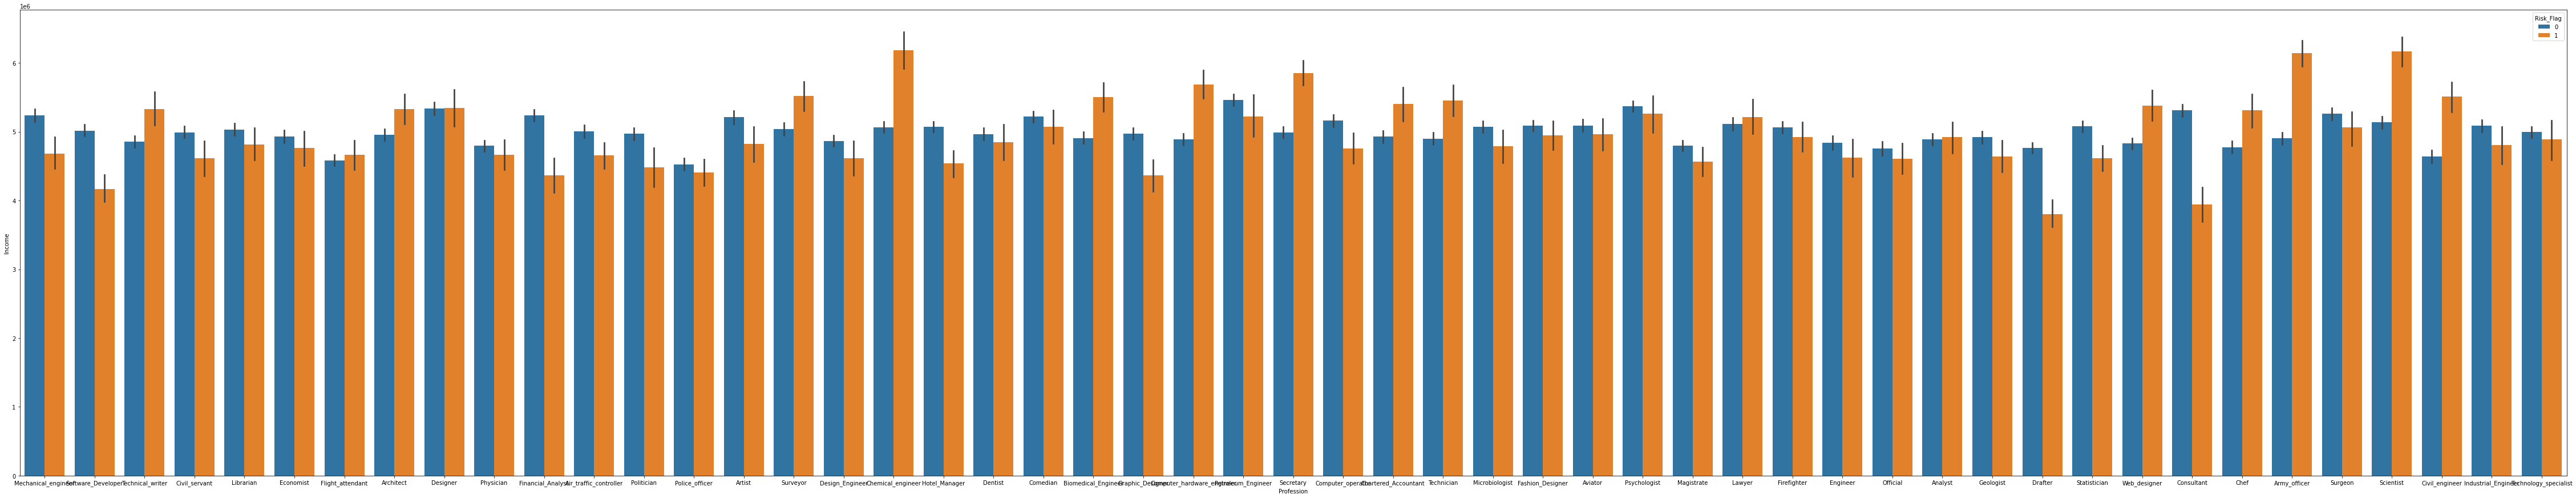

In [20]:
plt.figure(figsize=(80,15))
sns.barplot(data=df_loan, x="Profession", y="Income",hue='Risk_Flag')

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

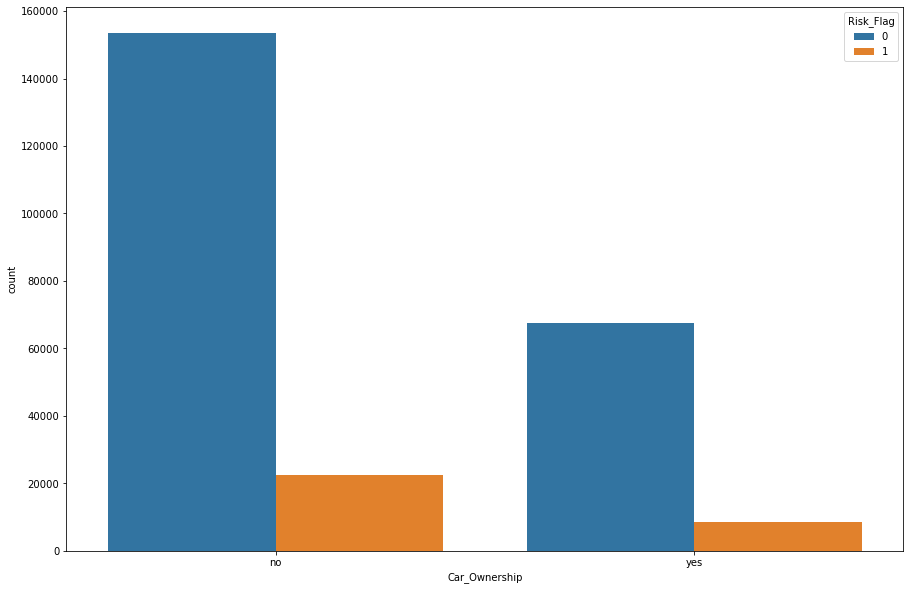

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_loan,x='Car_Ownership', hue="Risk_Flag")

### Checking the Statistical significance of variables
Checking the statistical correlation between all the numeric values and the Risk Flag

In [22]:
X_numeric = X[['Income','Age','Experience','CURRENT_JOB_YRS']]
X_catag = X[['Car_Ownership','Profession','CITY','STATE']]

In [23]:
for i in X_numeric.columns:
    coef, pval = stats.pearsonr(Y,X[i])
    print('Coefficient of Correlation of Risk Flag and',i,'is: ', coef)

Coefficient of Correlation of Risk Flag and Income is:  -0.003091168122272059
Coefficient of Correlation of Risk Flag and Age is:  -0.02180927605070727
Coefficient of Correlation of Risk Flag and Experience is:  -0.03452261289071677
Coefficient of Correlation of Risk Flag and CURRENT_JOB_YRS is:  -0.016941582052124884


#### As visible, none of the continuous variables have a significant enough coefficient of correlation to be of any statsitical significane on the Risk_Flag target variable.

In [24]:
for i in X_catag.columns:
    print(i,'has this many unique variables:',X[i].nunique())

Car_Ownership has this many unique variables: 2
Profession has this many unique variables: 51
CITY has this many unique variables: 317
STATE has this many unique variables: 29


In [25]:
X_temp = pd.concat([X,Y], axis = 1)
no = X_temp[X_temp['Car_Ownership'] == 0].Risk_Flag
yes = X_temp[X_temp['Car_Ownership'] == 1].Risk_Flag

In [26]:
stats.ttest_ind(no,yes)

Ttest_indResult(statistic=12.069223415433896, pvalue=1.56887748107285e-33)

#### Since the P-Value is less than 0.05, we can conclude that car ownership does have an impact on the overall risk flag.

## Feature Engineering

#### Scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scal = ss.fit_transform(X_numeric)
X_scal = pd.DataFrame(scal,columns=X_numeric.columns)
X_scal.head(3)

,Income,Age,Experience,CURRENT_JOB_YRS
0,-1.283145,-1.579604,-1.180232,-0.914131
1,0.895457,-0.583344,-0.014067,0.731036
2,-0.349269,0.940348,-1.013637,-0.639936


In [28]:
for i in X_numeric.columns:
    X[i] = X_scal[i]
X.head()

,Income,Age,Experience,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS
0,-1.283145,-1.579604,-1.180232,0,33,251,13,-0.914131
1,0.895457,-0.583344,-0.014067,0,43,227,14,0.731036
2,-0.349269,0.940348,-1.013637,0,47,8,12,-0.639936
3,0.437526,-0.524740,-1.346827,1,43,54,17,-1.188325
4,0.268128,-0.173119,0.152528,0,11,296,22,-0.914131


#### Transforming any Required Variables

Since we do not require the data to be normal for our Classification techniques, 
we will not normalize the data as this may result in the distruption of the structure and values of the data.

### Feature selection

In [29]:
X_temp = pd.concat([X,Y],axis = 1)
X_temp.head()

,Income,Age,Experience,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,Risk_Flag
0,-1.283145,-1.579604,-1.180232,0,33,251,13,-0.914131,0
1,0.895457,-0.583344,-0.014067,0,43,227,14,0.731036,0
2,-0.349269,0.940348,-1.013637,0,47,8,12,-0.639936,0
3,0.437526,-0.524740,-1.346827,1,43,54,17,-1.188325,1
4,0.268128,-0.173119,0.152528,0,11,296,22,-0.914131,1


In [30]:
X_temp = X.values
Y_temp = Y.astype(int)

print(X_temp.shape,Y_temp.shape)

(252000, 8) (252000,)


In [31]:
from sklearn.tree import   DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion='entropy',max_depth=10)
dt.fit(X_temp,Y_temp)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [32]:
fi = []
fi_col = []
for i,column in enumerate(X):
    print('The Feature importance of',column,'is :',dt.feature_importances_[i])
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The Feature importance of Income is : 0.24128265901932253
The Feature importance of Age is : 0.13534088289116986
The Feature importance of Experience is : 0.08125816104656192
The Feature importance of Car_Ownership is : 0.014740533168338439
The Feature importance of Profession is : 0.1398451563402527
The Feature importance of CITY is : 0.1971716263649797
The Feature importance of STATE is : 0.143757167816423
The Feature importance of CURRENT_JOB_YRS is : 0.04660381335295191


In [33]:
fis = pd.DataFrame(zip(fi_col,fi), columns = ['Column','Feature Importance'])
fis.sort_values('Feature Importance',ascending = False)

,Column,Feature Importance
0,Income,0.241283
5,CITY,0.197172
6,STATE,0.143757
4,Profession,0.139845
1,Age,0.135341
2,Experience,0.081258
7,CURRENT_JOB_YRS,0.046604
3,Car_Ownership,0.014741


<b> The variables 'CURRENT_JOB_YRS','Married/Single','House_Ownership','Car_Ownership' are not usefull features to the classification model. This will disturb the accuracy of our model so we are going to drop them.

In [34]:
X.head()

,Income,Age,Experience,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS
0,-1.283145,-1.579604,-1.180232,0,33,251,13,-0.914131
1,0.895457,-0.583344,-0.014067,0,43,227,14,0.731036
2,-0.349269,0.940348,-1.013637,0,47,8,12,-0.639936
3,0.437526,-0.524740,-1.346827,1,43,54,17,-1.188325
4,0.268128,-0.173119,0.152528,0,11,296,22,-0.914131


In [35]:
X.drop(['CURRENT_JOB_YRS','Car_Ownership'],axis = 1, inplace = True)

In [36]:
X.head()

,Income,Age,Experience,Profession,CITY,STATE
0,-1.283145,-1.579604,-1.180232,33,251,13
1,0.895457,-0.583344,-0.014067,43,227,14
2,-0.349269,0.940348,-1.013637,47,8,12
3,0.437526,-0.524740,-1.346827,43,54,17
4,0.268128,-0.173119,0.152528,11,296,22


### Treating Class Imbalance 

<AxesSubplot:>

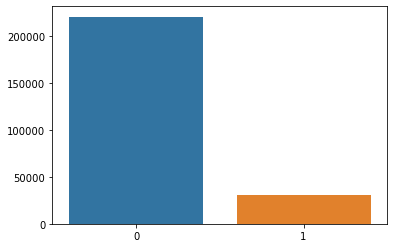

In [37]:
b = Y.value_counts()
sns.barplot(x = b.index,y = b.values)

In [76]:
p1 = Y[Y==0].count() / Y.count()
p1

0.877

In [38]:
from imblearn.combine import SMOTETomek

In [39]:
smk = SMOTETomek(random_state=42)
x,y = smk.fit_resample(X,Y)

<b>Our target variable is highly imbalanced. We should balace it by using SMOTE technique.

In [40]:
#splitting the data into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(sm.add_constant(x),y,test_size=0.2,random_state= 12)

In [ ]:
#Checking for multicolleniarty in our independant variables
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

## Decision Tree

In [41]:
from sklearn.datasets import make_classification
from sklearn import tree

In [42]:
decision_tree_classification = DecisionTreeClassifier(criterion='entropy',random_state=50)
decision_tree = decision_tree_classification.fit(X_train,Y_train)

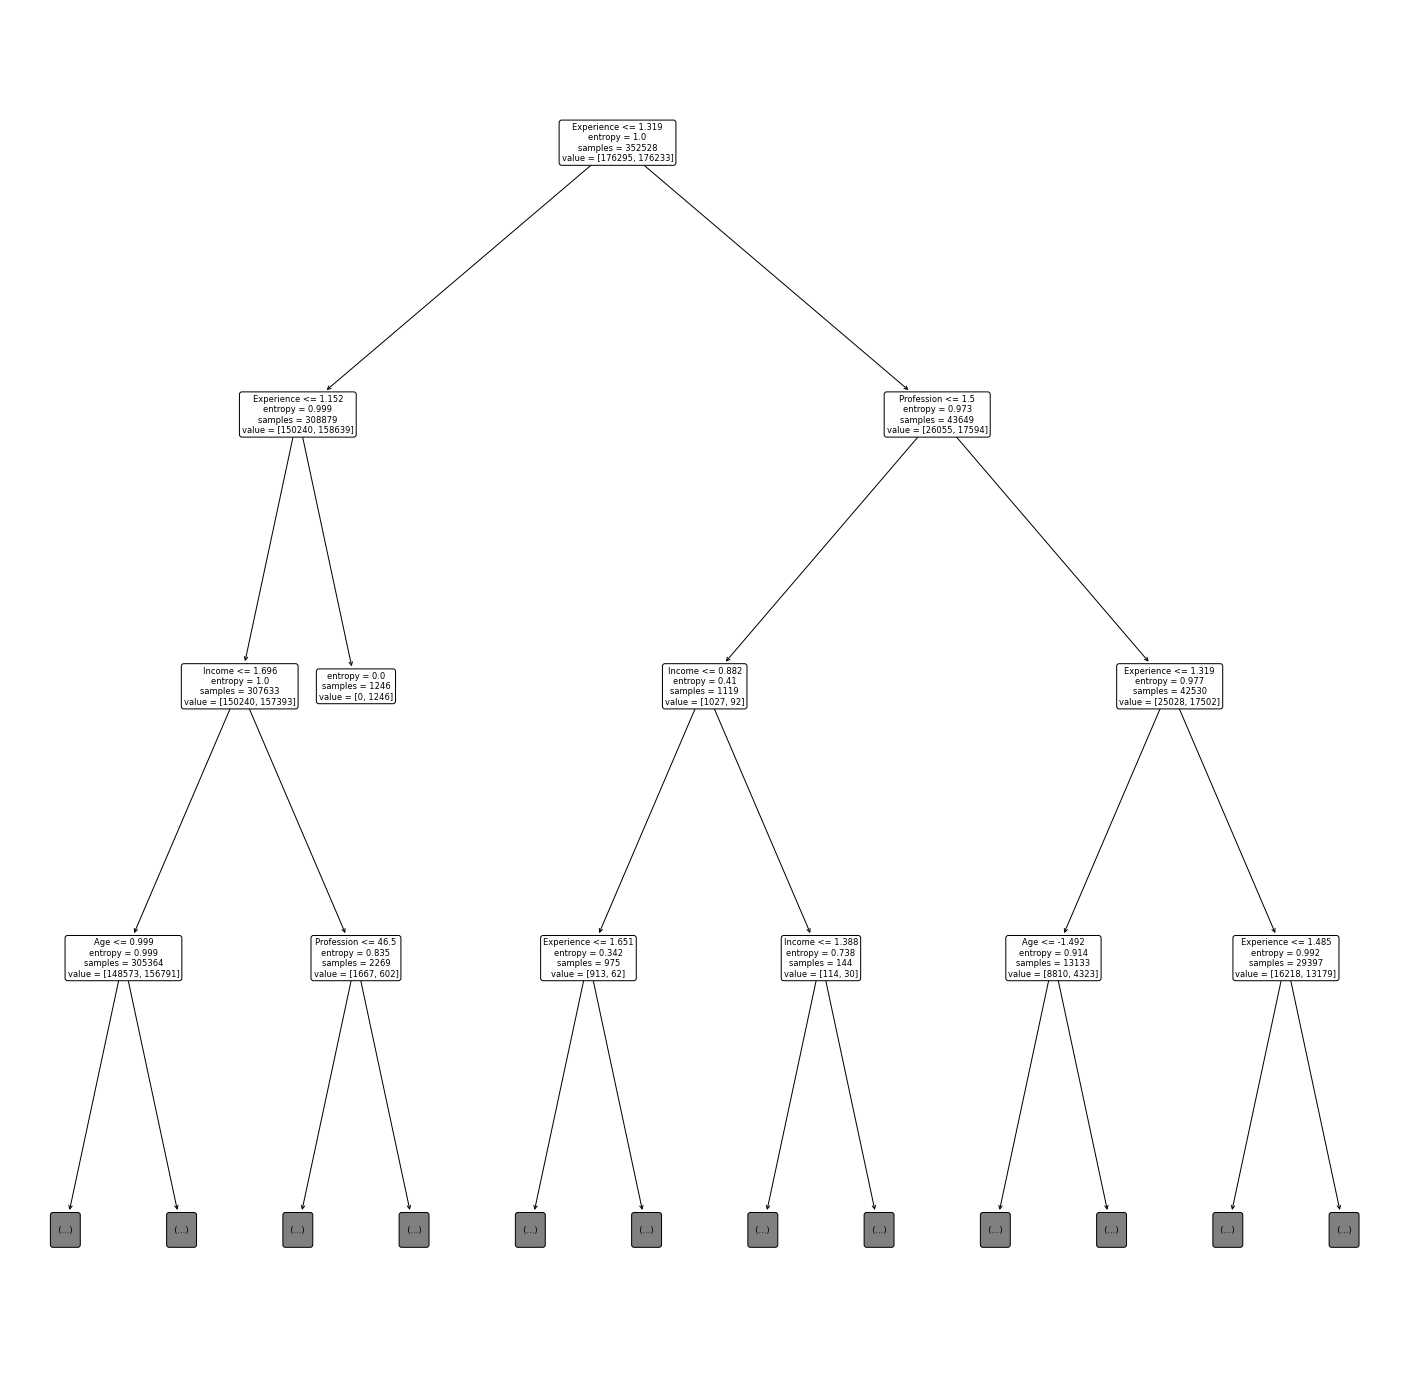

In [43]:
plt.figure(figsize=(25,25))
tree.plot_tree(decision_tree,max_depth=3,feature_names=X_train.columns,rounded=True)
plt.show()

In [66]:
train_predict = decision_tree.predict(X_train)
train_predict[0:20]

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [68]:
test_predict = decision_tree.predict(X_test)
test_predict[0:20]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

### Model Performance

In [45]:
from sklearn.metrics import classification_report

In [52]:
#General Function for Performace metrics for training set:
def train_report(model):
    train_pred=model.predict(X_train)
    return (classification_report(Y_train,train_pred))

In [47]:
#General Function for Performace metrics for testing set:
def test_report(model):
    test_pred=model.predict(X_test)
    return (classification_report(Y_test,test_pred))

### Train Report

In [53]:
train_report_dt=train_report(decision_tree)
print(train_report_dt)

              precision    recall  f1-score   support

           0       1.00      0.91      0.96    176295
           1       0.92      1.00      0.96    176233

    accuracy                           0.96    352528
   macro avg       0.96      0.96      0.96    352528
weighted avg       0.96      0.96      0.96    352528



<AxesSubplot:>

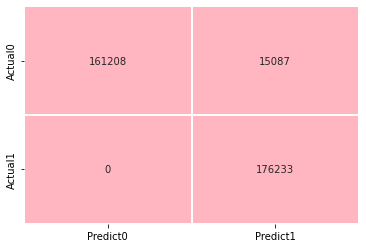

In [67]:
cm=confusion_matrix(Y_train,train_predict)
conf_matrix=pd.DataFrame(data=cm, columns=['Predict0','Predict1'],index=['Actual0','Actual1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightpink']),cbar=False,linewidth=0.2)

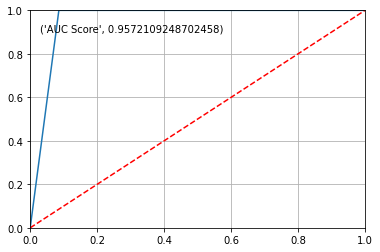

In [72]:
fpr,tpr,thresholds=roc_curve(Y_train,train_predict)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.03,y=0.9,s=('AUC Score',metrics.roc_auc_score(Y_train,train_predict)))
plt.grid(True)

### Test Report

In [49]:
test_report_dt=test_report(decision_tree)
print(test_report_dt)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44035
           1       0.89      0.96      0.92     44097

    accuracy                           0.92     88132
   macro avg       0.92      0.92      0.92     88132
weighted avg       0.92      0.92      0.92     88132



<AxesSubplot:>

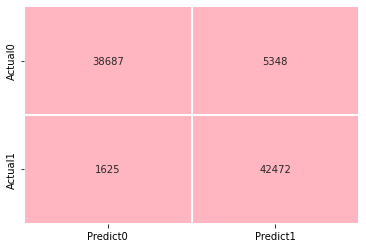

In [70]:
cm=confusion_matrix(Y_test,test_predict)
conf_matrix=pd.DataFrame(data=cm, columns=['Predict0','Predict1'],index=['Actual0','Actual1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightpink']),cbar=False,linewidth=0.2)

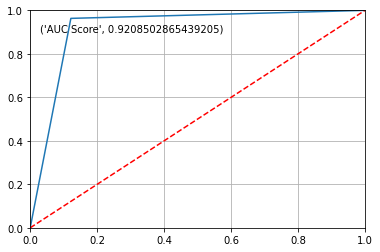

In [73]:
fpr,tpr,thresholds=roc_curve(Y_test,test_predict)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.03,y=0.9,s=('AUC Score',metrics.roc_auc_score(Y_test,test_predict)))
plt.grid(True)

### Pruning Of Decision Tree

In [77]:
DT_1=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=5,max_leaf_nodes=5,random_state=100)
decision_tree=DT_1.fit(X_train,Y_train)
train_report_dt1=train_report(decision_tree)
print(train_report_dt1)

              precision    recall  f1-score   support

           0       0.60      0.16      0.25    176295
           1       0.52      0.90      0.65    176233

    accuracy                           0.53    352528
   macro avg       0.56      0.53      0.45    352528
weighted avg       0.56      0.53      0.45    352528



In [78]:
test_report_dt1=test_report(decision_tree)
print(test_report_dt1)

              precision    recall  f1-score   support

           0       0.60      0.16      0.25     44035
           1       0.52      0.90      0.66     44097

    accuracy                           0.53     88132
   macro avg       0.56      0.53      0.45     88132
weighted avg       0.56      0.53      0.45     88132



## Hyperparameters tuning for DT (GridSearchCV):

In [41]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#import pydotplus
from IPython.display import Image  

In [83]:
tune_para=[{'criterion':['gini','entropy'],'max_depth':range(2,8),'max_leaf_nodes':range(1,8),'min_samples_split':range(2,7),'min_samples_leaf':range(1,7),'max_features':['sqrt','log2']}]
decision_tree_classification=DecisionTreeClassifier(random_state=100)
dt_grid=GridSearchCV(estimator=decision_tree_classification,param_grid=tune_para,cv=4)
dt_grid_model=dt_grid.fit(X_train,Y_train)
print('Best Parameters for DT:',dt_grid_model.best_params_,'\n')

Best Parameters for DT: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [85]:
tune_para=[{'criterion':['gini','entropy'],'max_depth':range(2,10),'max_leaf_nodes':range(1,10),'min_samples_split':range(2,9),'min_samples_leaf':range(1,9),'max_features':['sqrt','log2']}]
decision_tree_classification=DecisionTreeClassifier(random_state=100)
dt_grid=GridSearchCV(estimator=decision_tree_classification,param_grid=tune_para,cv=4)
dt_grid_model=dt_grid.fit(X_train,Y_train)
print('Best Parameters for DT:',dt_grid_model.best_params_,'\n')

Best Parameters for DT: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2} 



### DT for tuned hyeperparameters:

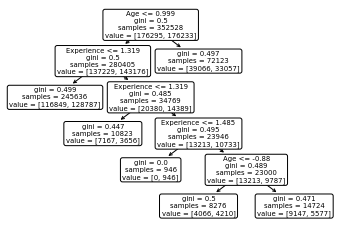

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.31      0.40    176295
           1       0.53      0.76      0.62    176233

    accuracy                           0.54    352528
   macro avg       0.55      0.54      0.51    352528
weighted avg       0.55      0.54      0.51    352528

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.31      0.40     44035
           1       0.52      0.76      0.62     44097

    accuracy                           0.53     88132
   macro avg       0.54      0.53      0.51     88132
weighted avg       0.54      0.53      0.51     88132



In [84]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='sqrt',max_leaf_nodes=6,min_samples_leaf=1,min_samples_split=2,random_state=100)
dt_model=dt_model.fit(X_train,Y_train)
tree.plot_tree(dt_model,feature_names=X_train.columns,rounded=True)
plt.show()
print('Train Classification Report: \n',train_report(dt_model))
print('Test Classification Report: \n',test_report(dt_model))

## Random Forest

In [45]:
rf_classification=RandomForestClassifier(n_estimators=12,random_state=100)
rf_model=rf_classification.fit(X_train,Y_train)
train_report_rf=train_report(rf_model)
print(train_report_rf)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    176295
           1       0.92      1.00      0.96    176233

    accuracy                           0.96    352528
   macro avg       0.96      0.96      0.96    352528
weighted avg       0.96      0.96      0.96    352528



In [46]:
test_report_rf=test_report(rf_model)
print(test_report_rf)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     44035
           1       0.90      0.97      0.93     44097

    accuracy                           0.93     88132
   macro avg       0.93      0.93      0.93     88132
weighted avg       0.93      0.93      0.93     88132



In [59]:
train_pred=rf_model.predict(X_train)

<AxesSubplot:>

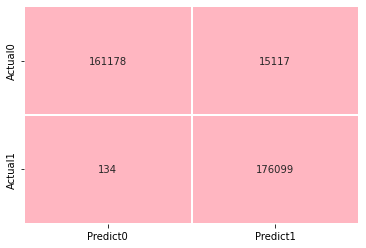

In [68]:
cm=confusion_matrix(Y_train,train_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predict0','Predict1'],index=['Actual0','Actual1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightpink']),cbar=False,linewidth=0.2)

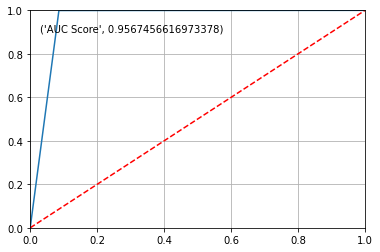

In [60]:
fpr,tpr,thresholds=roc_curve(Y_train,train_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.03,y=0.9,s=('AUC Score',metrics.roc_auc_score(Y_train,train_pred)))
plt.grid(True)

In [69]:
test_pred=rf_model.predict(X_test)

<AxesSubplot:>

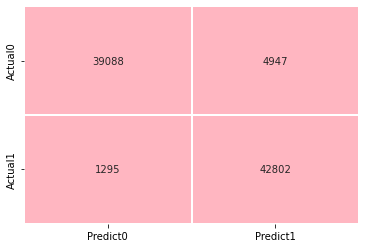

In [72]:
cm=confusion_matrix(Y_test,test_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predict0','Predict1'],index=['Actual0','Actual1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightpink']),cbar=False,linewidth=0.2)

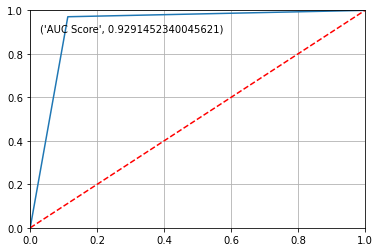

In [58]:
fpr,tpr,thresholds=roc_curve(Y_test,test_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.03,y=0.9,s=('AUC Score',metrics.roc_auc_score(Y_test,test_pred)))
plt.grid(True)

### Tuning using Grid search CV

In [ ]:
tune_para=[{'criterion':['gini','entropy'],'n_estimators':[8,10,20,30,50,70],'max_depth':[10,15,20],'max_leaf_nodes':[2,3,5,9],'min_samples_split':[1,3,5,7],'min_samples_leaf':[2,3,4,5],'max_features':['sqrt','log2']}]
random_forest_classification=RandomForestClassifier(random_state=100)
rf_grid=GridSearchCV(estimator=random_forest_classification,param_grid=tune_para,cv=5)
rf_grid_model=rf_grid.fit(X_train,Y_train)
print('Best Parameters for RF:',rf_grid_model.best_params_,'\n')

### Observation

Since the VIF value are less than 5 for all the independent variables, we conclude that there is no multi-collinearity.

### The independent variables are linearly related to the log odds

In [ ]:
df_loan.head(2)

In [ ]:
Y_temp

In [ ]:
df_full = pd.concat([X_scal,X_catag,Y_temp],axis=1)

In [ ]:
df = df_loan

In [ ]:
for i in range(len(l)):
    title = l[i] + '  Log odds linear plot'
    xvar  = l[i]
    check_linearity(xvar,df,title,Y)

### Base model building

In [ ]:
logit = sm.Logit( Y_train, X_train ) 
lr    = logit.fit()
### Report Psuedo R-square, model coefficients and p-value
lr.summary()

In [ ]:
def get_significant_vars( lm, sig_level ):
    
    import pandas as pd
    
    var_p_vals_df         = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    
    return list( var_p_vals_df[var_p_vals_df.pvals <= sig_level]['vars'] )

In [ ]:
significant_vars = get_significant_vars( lr, sig_level = 0.05 )
print(significant_vars)

In [ ]:
print('AIC :',lr.aic)

### Odds

In [ ]:
df_odds = pd.DataFrame(np.exp(lr.params),columns=['Odds'])
df_odds

In [ ]:
smk = SMOTETomek(random_state=42)
X_test,Y_test = smk.fit_resample(sm.add_constant(X_test),Y_test)

In [ ]:
X_test.head(2)

In [ ]:
y_pred_prob = lr.predict(X_test)
y_pred_prob.head(10)

In [ ]:
y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]
y_pred[0:10]

#### Model Performance
Confusion Matrix

In [ ]:
    from   sklearn.linear_model     import  LogisticRegression 
    from   sklearn.metrics          import  classification_report
    from   sklearn.metrics          import  confusion_matrix
    from   sklearn.model_selection  import  cross_val_score
cm = confusion_matrix(Y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predict0','Predict1'],index=['Actual0','Actual1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cbar=False,linewidth=0.2)

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [ ]:
accuracy=(TN+TP)/(TN+TP+FP+FN)
accuracy

In [ ]:
precision=TP/(TP+FP)
precision

In [ ]:
recall=TP/(TP+FN)
recall

In [ ]:
f1_score=2*(precision*recall)/(precision+recall)
f1_score

In [ ]:
acc_report=classification_report(Y_test,y_pred)
print(acc_report)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.03,y=0.9,s=('AUC Score',metrics.roc_auc_score(Y_test,y_pred_prob)))
plt.grid(True)